<a href="https://colab.research.google.com/github/kgpawar/Big-Data/blob/main/PySpark_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=943b74346485d17dee5fe6434a9c047829d780c7efb638e73c726fc4826465ec
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master("local[4]").appName('Krishna Pawar').getOrCreate()

In [4]:
# Spark Context Object
sc = spark.sparkContext

In [5]:
df = spark.read.csv('student.csv')

In [6]:
import os
os.getcwd()

'/content'

In [7]:
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string]

In [8]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)



In [10]:
df.head(1)

[Row(_c0='roll', _c1='name', _c2='class', _c3='marks', _c4='age')]

In [11]:
#Here we fix first row as header
df1 = spark.read.option('header',True).csv('student.csv')

In [12]:
df1

DataFrame[roll: string, name: string, class: string, marks: string, age: string]

In [15]:
df1.printSchema()

root
 |-- roll: string (nullable = true)
 |-- name: string (nullable = true)
 |-- class: string (nullable = true)
 |-- marks: string (nullable = true)
 |-- age: string (nullable = true)



In [16]:
df1.head(1)

[Row(roll='1', name='anil', class='TE', marks='56.77', age='22')]

In [17]:
df2 = spark.read.csv('student3.tsv')

In [18]:
df2.head(5)

[Row(_c0='roll\tname\tclass\tmarks\tage'),
 Row(_c0='1\tanil\tTE\t56.77\t22'),
 Row(_c0='2\tamit\tTE\t59.77\t21'),
 Row(_c0='3\taniket\tBE\t76.88\t19'),
 Row(_c0='4\tajinkya\tTE\t69.66\t20')]

In [19]:
df3 = spark.read.option('delimiter','\t').option('header',True).csv('student3.tsv')
#OR
#df3 = spark.read.option(delimiter='\t').option('header',True).csv('student3.tsv')

In [20]:
df3.head(5)

[Row(roll='1', name='anil', class='TE', marks='56.77', age='22'),
 Row(roll='2', name='amit', class='TE', marks='59.77', age='21'),
 Row(roll='3', name='aniket', class='BE', marks='76.88', age='19'),
 Row(roll='4', name='ajinkya', class='TE', marks='69.66', age='20'),
 Row(roll='5', name='asha', class='TE', marks='63.28', age='20')]

In [21]:
df3.tail(3)

[Row(roll='8', name='amita', class='BE', marks='68.33', age='23'),
 Row(roll='9', name='amol', class='TE', marks='56.75', age='20'),
 Row(roll='10', name='anmol', class='BE', marks='78.66', age='21')]

In [24]:
#to identify data type of elements in column
df4=spark.read.options(header=True,inferSchema=True).csv('student.csv')

In [26]:
df4.printSchema()

root
 |-- roll: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- class: string (nullable = true)
 |-- marks: double (nullable = true)
 |-- age: integer (nullable = true)



In [27]:
from pyspark.sql.types import *

In [28]:
#here we create schema with data type & enforcing to file
schema = StructType()\
          .add("roll",IntegerType(),True)\
          .add("name",StringType(),True)\
          .add("class",StringType(),True)\
          .add("marks",DoubleType(),True)\
          .add("age",IntegerType(),True)

In [30]:
df_s = spark.read.format("csv")\
        .option("header",True)\
        .schema(schema)\
        .load("student.csv")

In [31]:
df_s.head(4)

[Row(roll=1, name='anil', class='TE', marks=56.77, age=22),
 Row(roll=2, name='amit', class='TE', marks=59.77, age=21),
 Row(roll=3, name='aniket', class='BE', marks=76.88, age=19),
 Row(roll=4, name='ajinkya', class='TE', marks=69.66, age=20)]

In [32]:
#we can save above file in new file
df_s.write.options(header=True).csv('neawfile')

In [33]:
# we can read JSON file also
df_j = spark.read.json('students.json')

In [34]:
df_j.head(5)

[Row(_id=0, name='aimee Zank', scores=[Row(score=1.463179736705023, type='exam'), Row(score=11.78273309957772, type='quiz'), Row(score=35.8740349954354, type='homework')]),
 Row(_id=1, name='Aurelia Menendez', scores=[Row(score=60.06045071030959, type='exam'), Row(score=52.79790691903873, type='quiz'), Row(score=71.76133439165544, type='homework')]),
 Row(_id=2, name='Corliss Zuk', scores=[Row(score=67.03077096065002, type='exam'), Row(score=6.301851677835235, type='quiz'), Row(score=66.28344683278382, type='homework')]),
 Row(_id=3, name='Bao Ziglar', scores=[Row(score=71.64343899778332, type='exam'), Row(score=24.80221293650313, type='quiz'), Row(score=42.26147058804812, type='homework')]),
 Row(_id=4, name='Zachary Langlais', scores=[Row(score=78.68385091304332, type='exam'), Row(score=90.2963101368042, type='quiz'), Row(score=34.41620148042529, type='homework')])]

In [35]:
type(df_j)

pyspark.sql.dataframe.DataFrame

In [36]:
df.show()

+----+-------+-----+-----+---+
| _c0|    _c1|  _c2|  _c3|_c4|
+----+-------+-----+-----+---+
|roll|   name|class|marks|age|
|   1|   anil|   TE|56.77| 22|
|   2|   amit|   TE|59.77| 21|
|   3| aniket|   BE|76.88| 19|
|   4|ajinkya|   TE|69.66| 20|
|   5|   asha|   TE|63.28| 20|
|   6| ayesha|   BE|49.55| 20|
|   7|   amar|   BE|65.34| 19|
|   8|  amita|   BE|68.33| 23|
|   9|   amol|   TE|56.75| 20|
|  10|  anmol|   BE|78.66| 21|
+----+-------+-----+-----+---+



In [37]:
df_j.show()

+---+------------------+--------------------+
|_id|              name|              scores|
+---+------------------+--------------------+
|  0|        aimee Zank|[{1.4631797367050...|
|  1|  Aurelia Menendez|[{60.060450710309...|
|  2|       Corliss Zuk|[{67.030770960650...|
|  3|        Bao Ziglar|[{71.643438997783...|
|  4|  Zachary Langlais|[{78.683850913043...|
|  5|    Wilburn Spiess|[{44.871863301812...|
|  6|  Jenette Flanders|[{37.322854591660...|
|  7|      Salena Olmos|[{90.378265091571...|
|  8|      Daphne Zheng|[{22.135837128626...|
|  9|        Sanda Ryba|[{97.005099536546...|
| 10|      Denisha Cast|[{45.618768622594...|
| 11|      Marcus Blohm|[{78.426178356518...|
| 12|    Quincy Danaher|[{54.298412785206...|
| 13|  Jessika Dagenais|[{90.471799544274...|
| 14|     Alix Sherrill|[{25.159241519982...|
| 15|    Tambra Mercure|[{69.156502253315...|
| 16|     Dodie Staller|[{7.7723864428582...|
| 17|Fletcher Mcconnell|[{39.410110697292...|
| 18|  Verdell Sowinski|[{62.12870

In [39]:
df1.select('name').show()

+-------+
|   name|
+-------+
|   anil|
|   amit|
| aniket|
|ajinkya|
|   asha|
| ayesha|
|   amar|
|  amita|
|   amol|
|  anmol|
+-------+



In [41]:
df1.select(['name','marks']).show()

+-------+-----+
|   name|marks|
+-------+-----+
|   anil|56.77|
|   amit|59.77|
| aniket|76.88|
|ajinkya|69.66|
|   asha|63.28|
| ayesha|49.55|
|   amar|65.34|
|  amita|68.33|
|   amol|56.75|
|  anmol|78.66|
+-------+-----+



In [43]:
df1.filter(df1['marks']>60).show()

+----+-------+-----+-----+---+
|roll|   name|class|marks|age|
+----+-------+-----+-----+---+
|   3| aniket|   BE|76.88| 19|
|   4|ajinkya|   TE|69.66| 20|
|   5|   asha|   TE|63.28| 20|
|   7|   amar|   BE|65.34| 19|
|   8|  amita|   BE|68.33| 23|
|  10|  anmol|   BE|78.66| 21|
+----+-------+-----+-----+---+



In [50]:
df1.filter((df1['class']=="BE") & (df1['marks']>60)).show()

+----+------+-----+-----+---+
|roll|  name|class|marks|age|
+----+------+-----+-----+---+
|   3|aniket|   BE|76.88| 19|
|   7|  amar|   BE|65.34| 19|
|   8| amita|   BE|68.33| 23|
|  10| anmol|   BE|78.66| 21|
+----+------+-----+-----+---+



In [51]:
df1.groupBy('class').count().show()

+-----+-----+
|class|count|
+-----+-----+
|   TE|    5|
|   BE|    5|
+-----+-----+



In [52]:
df1.groupBy('class').max().show()

+-----+
|class|
+-----+
|   TE|
|   BE|
+-----+



In [54]:
df4.select(['class','marks']).groupBy('class').max().show()

+-----+----------+
|class|max(marks)|
+-----+----------+
|   TE|     69.66|
|   BE|     78.66|
+-----+----------+



In [55]:
x = df4.toDF('roll','name','class','marks','age')

In [56]:
x.show(5)

+----+-------+-----+-----+---+
|roll|   name|class|marks|age|
+----+-------+-----+-----+---+
|   1|   anil|   TE|56.77| 22|
|   2|   amit|   TE|59.77| 21|
|   3| aniket|   BE|76.88| 19|
|   4|ajinkya|   TE|69.66| 20|
|   5|   asha|   TE|63.28| 20|
+----+-------+-----+-----+---+
only showing top 5 rows



In [57]:
#shallow Copy
a=[1,2,3]
b=a

In [58]:
b.append(4)
a

[1, 2, 3, 4]

In [59]:
id(a),id(b)

(139998447809280, 139998447809280)

In [61]:
# renaming the columns
newdf = df4.toDF('1','2','3','4','5')
newdf.show()

+---+-------+---+-----+---+
|  1|      2|  3|    4|  5|
+---+-------+---+-----+---+
|  1|   anil| TE|56.77| 22|
|  2|   amit| TE|59.77| 21|
|  3| aniket| BE|76.88| 19|
|  4|ajinkya| TE|69.66| 20|
|  5|   asha| TE|63.28| 20|
|  6| ayesha| BE|49.55| 20|
|  7|   amar| BE|65.34| 19|
|  8|  amita| BE|68.33| 23|
|  9|   amol| TE|56.75| 20|
| 10|  anmol| BE|78.66| 21|
+---+-------+---+-----+---+



In [63]:
# Count total number of rows
df4.count()

10

In [66]:
# Print the names of columns
df4.columns

['roll', 'name', 'class', 'marks', 'age']

In [65]:
newdf.columns

['1', '2', '3', '4', '5']

In [70]:
df4.take(6)

[Row(roll=1, name='anil', class='TE', marks=56.77, age=22),
 Row(roll=2, name='amit', class='TE', marks=59.77, age=21),
 Row(roll=3, name='aniket', class='BE', marks=76.88, age=19),
 Row(roll=4, name='ajinkya', class='TE', marks=69.66, age=20),
 Row(roll=5, name='asha', class='TE', marks=63.28, age=20),
 Row(roll=6, name='ayesha', class='BE', marks=49.55, age=20)]

In [71]:
# drop the unwanted column
df4.drop('class').show(5)

+----+-------+-----+---+
|roll|   name|marks|age|
+----+-------+-----+---+
|   1|   anil|56.77| 22|
|   2|   amit|59.77| 21|
|   3| aniket|76.88| 19|
|   4|ajinkya|69.66| 20|
|   5|   asha|63.28| 20|
+----+-------+-----+---+
only showing top 5 rows



In [76]:
# To create Panda DataFrame from existing spark dataframe
pdf = df4.toPandas()

In [77]:
pdf

,roll,name,class,marks,age
0,1,anil,TE,56.77,22
1,2,amit,TE,59.77,21
2,3,aniket,BE,76.88,19
3,4,ajinkya,TE,69.66,20
4,5,asha,TE,63.28,20
5,6,ayesha,BE,49.55,20
6,7,amar,BE,65.34,19
7,8,amita,BE,68.33,23
8,9,amol,TE,56.75,20
9,10,anmol,BE,78.66,21


In [80]:
gender=['M','M','M','M','F','F','M','F','M','M']

In [81]:
pdf['gender']=gender

In [82]:
pdf

,roll,name,class,marks,age,gender
0,1,anil,TE,56.77,22,M
1,2,amit,TE,59.77,21,M
2,3,aniket,BE,76.88,19,M
3,4,ajinkya,TE,69.66,20,M
4,5,asha,TE,63.28,20,F
5,6,ayesha,BE,49.55,20,F
6,7,amar,BE,65.34,19,M
7,8,amita,BE,68.33,23,F
8,9,amol,TE,56.75,20,M
9,10,anmol,BE,78.66,21,M


In [84]:
pdf['marks']=pdf['marks']+0.5

In [85]:
pdf

,roll,name,class,marks,age,gender
0,1,anil,TE,57.27,22,M
1,2,amit,TE,60.27,21,M
2,3,aniket,BE,77.38,19,M
3,4,ajinkya,TE,70.16,20,M
4,5,asha,TE,63.78,20,F
5,6,ayesha,BE,50.05,20,F
6,7,amar,BE,65.84,19,M
7,8,amita,BE,68.83,23,F
8,9,amol,TE,57.25,20,M
9,10,anmol,BE,79.16,21,M


In [91]:
pdf['name']=pdf['name'].str.upper()

In [92]:
pdf

,roll,name,class,marks,age,gender
0,1,ANIL,TE,57.27,22,M
1,2,AMIT,TE,60.27,21,M
2,3,ANIKET,BE,77.38,19,M
3,4,AJINKYA,TE,70.16,20,M
4,5,ASHA,TE,63.78,20,F
5,6,AYESHA,BE,50.05,20,F
6,7,AMAR,BE,65.84,19,M
7,8,AMITA,BE,68.83,23,F
8,9,AMOL,TE,57.25,20,M
9,10,ANMOL,BE,79.16,21,M


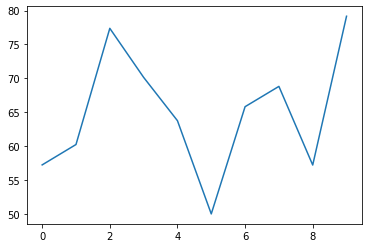

In [93]:
pdf['marks'].plot()

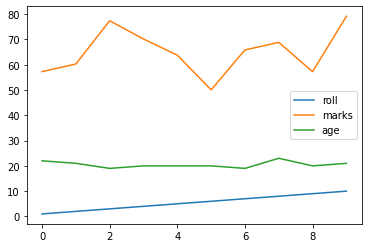

In [95]:
pdf.plot()

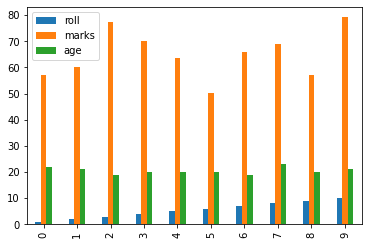

In [96]:
pdf.plot.bar()

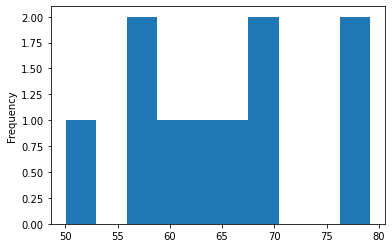

In [99]:
pdf['marks'].plot.hist()

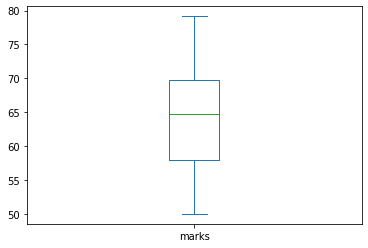

In [100]:
pdf['marks'].plot.box()

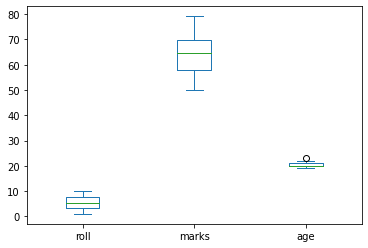

In [101]:
pdf.plot.box()

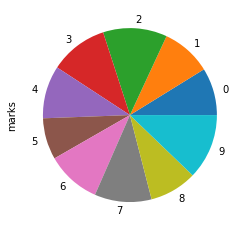

In [102]:
pdf['marks'].plot.pie()

In [106]:
# Check the data in vertical format
df4.show(n=3,vertical=True)

-RECORD 0-------
 roll  | 1      
 name  | anil   
 class | TE     
 marks | 56.77  
 age   | 22     
-RECORD 1-------
 roll  | 2      
 name  | amit   
 class | TE     
 marks | 59.77  
 age   | 21     
-RECORD 2-------
 roll  | 3      
 name  | aniket 
 class | BE     
 marks | 76.88  
 age   | 19     
only showing top 3 rows

-RECORD 0-------
 roll  | 1      
 name  | anil   
 class | TE     
 marks | 56.77  
 age   | 22     
-RECORD 1-------
 roll  | 2      
 name  | amit   
 class | TE     
 marks | 59.77  
 age   | 21     
-RECORD 2-------
 roll  | 3      
 name  | aniket 
 class | BE     
 marks | 76.88  
 age   | 19     
only showing top 3 rows



In [107]:
# Check the data in sorted fashion
df4.orderBy('marks').show(5) 

+----+------+-----+-----+---+
|roll|  name|class|marks|age|
+----+------+-----+-----+---+
|   6|ayesha|   BE|49.55| 20|
|   9|  amol|   TE|56.75| 20|
|   1|  anil|   TE|56.77| 22|
|   2|  amit|   TE|59.77| 21|
|   5|  asha|   TE|63.28| 20|
+----+------+-----+-----+---+
only showing top 5 rows

+----+------+-----+-----+---+
|roll|  name|class|marks|age|
+----+------+-----+-----+---+
|   6|ayesha|   BE|49.55| 20|
|   9|  amol|   TE|56.75| 20|
|   1|  anil|   TE|56.77| 22|
|   2|  amit|   TE|59.77| 21|
|   5|  asha|   TE|63.28| 20|
+----+------+-----+-----+---+
only showing top 5 rows



In [108]:
pdf.sort_values(by='marks',ascending=False).head()

,roll,name,class,marks,age,gender
9,10,ANMOL,BE,79.16,21,M
2,3,ANIKET,BE,77.38,19,M
3,4,AJINKYA,TE,70.16,20,M
7,8,AMITA,BE,68.83,23,F
6,7,AMAR,BE,65.84,19,M


In [109]:
df4.describe().show()

+-------+------------------+-------+-----+-----------------+------------------+
|summary|              roll|   name|class|            marks|               age|
+-------+------------------+-------+-----+-----------------+------------------+
|  count|                10|     10|   10|               10|                10|
|   mean|               5.5|   null| null|           64.499|              20.5|
| stddev|3.0276503540974917|   null| null|9.207178901994537|1.2692955176439846|
|    min|                 1|ajinkya|   BE|            49.55|                19|
|    max|                10| ayesha|   TE|            78.66|                23|
+-------+------------------+-------+-----+-----------------+------------------+



In [110]:
pdf.describe()

,roll,marks,age
count,10.00000,10.000000,10.000000
mean,5.50000,64.999000,20.500000
std,3.02765,9.207179,1.269296
min,1.00000,50.050000,19.000000
25%,3.25000,58.020000,20.000000
50%,5.50000,64.810000,20.000000
75%,7.75000,69.827500,21.000000
max,10.00000,79.160000,23.000000


In [111]:
# aggregate function
df4.agg({'marks':'min'}).show()

+----------+
|min(marks)|
+----------+
|     49.55|
+----------+



In [112]:
df4.agg({'marks':'stddev'}).show()

+-----------------+
|    stddev(marks)|
+-----------------+
|9.207178901994537|
+-----------------+



In [113]:
df4.agg({'marks':'mean'}).show()

+----------+
|avg(marks)|
+----------+
|    64.499|
+----------+



In [115]:
df4.summary().show()

+-------+------------------+-------+-----+-----------------+------------------+
|summary|              roll|   name|class|            marks|               age|
+-------+------------------+-------+-----+-----------------+------------------+
|  count|                10|     10|   10|               10|                10|
|   mean|               5.5|   null| null|           64.499|              20.5|
| stddev|3.0276503540974917|   null| null|9.207178901994537|1.2692955176439846|
|    min|                 1|ajinkya|   BE|            49.55|                19|
|    25%|                 3|   null| null|            56.77|                20|
|    50%|                 5|   null| null|            63.28|                20|
|    75%|                 8|   null| null|            69.66|                21|
|    max|                10| ayesha|   TE|            78.66|                23|
+-------+------------------+-------+-----+-----------------+------------------+

